# Cart Optimization For Budget

Imprting the libraries

In [7]:
import pandas as pd
import random
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

Reading the file

In [ ]:
file_path = "sample_data.xlsx"
df = pd.read_excel(file_path)

Ploting the graph of dataset

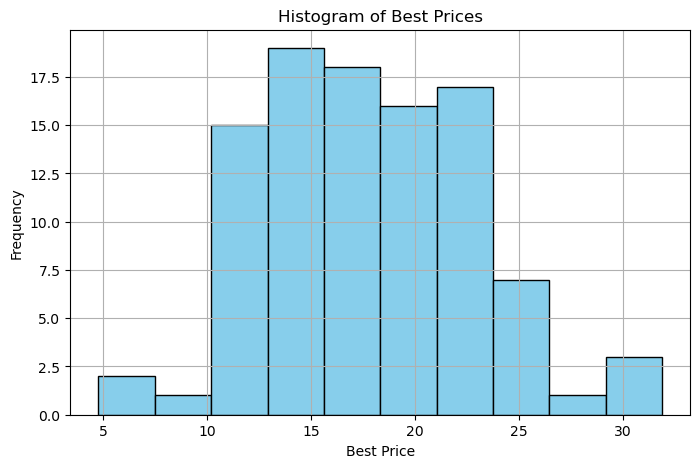

In [9]:
# Plot histogram for best price
plt.figure(figsize=(8, 5))
plt.hist(df['best price'], bins=10, edgecolor='black', color='skyblue')
plt.title('Histogram of Best Prices')
plt.xlabel('Best Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Customer Setting there budget before starting there shopping

In [18]:
budget = float(input("Enter your shopping budget: $"))

print(f"Your budget is set to ${budget:.2f}")


Your budget is set to $20.00


Showing customer the list from which he can select items to shop

In [19]:
# Get all unique items (no duplicates)
inventory = df[['item ID', 'subcategory', 'brand', 'best price']].drop_duplicates()
inventory = inventory.rename(columns={'best price': 'price'})

# Display the full list
pd.set_option('display.max_rows', None)  # show all rows
print("\n Available Items:")
print(inventory.to_string(index=False))


 Available Items:
 item ID subcategory     brand  price
    6816       Chips   Cheetos  15.44
    4581        Milk    Anchor  23.44
    9619         TVs   Samsung  20.60
    3426       Chips   Cheetos  19.89
    5988         TVs   Samsung   4.76
    7321      Cheese      Bega  16.20
    2182        Soda Coca-Cola  22.90
    5683        Soda    Nestle  14.63
    4494       Water    Lipton  31.87
    6342      Phones        LG  12.42
    7204     Popcorn   Doritos  21.47
    9935      Phones   Samsung  15.23
    5973     Laptops   Samsung  12.48
    9326       Water    Nestle  18.80
    4394      Cheese    Danone  22.69
    2252      Phones   Samsung  20.51
    2209       Water    Lipton  23.78
    2042        Soda    Nestle  14.94
    2241        Soda    Lipton  21.49
    4613         TVs     Apple  12.91
    7013      Phones   Samsung  16.81
    9150       Juice    Nestle   9.85
    3724        Milk      Bega  24.72
    5766       Chips   Cheetos  17.48
    8241    Biscuits  Pringles 

Customer can select items from the given list and add them up

In [20]:
# Step: Customer selects items
selected_ids = []

while True:
    entry = input("\nEnter item ID to add to cart (type 'done' when finished): ").strip()
    
    if entry.lower() == 'done':
        break
    elif entry.isdigit() and int(entry) in inventory['item ID'].astype(int).values:
        selected_ids.append(int(entry))
        print(" Item added to cart.")
    else:
        print("Invalid item ID. Please try again.")

# Build cart
#cart = inventory[inventory['item ID'].isin(selected_ids)]
cart = df[df['item ID'].isin(selected_ids)][['item ID', 'subcategory', 'brand', 'best price', 'category', 'location', 'type']]
cart = cart.rename(columns={'best price': 'price'})


# Show final cart
print("\nYour Cart:")
print(cart.to_string(index=False))

# Show total price
total = cart['price'].sum()
print(f"\n Total cart cost: ${total:.2f}")

 Item added to cart.
 Item added to cart.
 Item added to cart.
 Item added to cart.
 Item added to cart.
 Item added to cart.
 Item added to cart.
 Item added to cart.

Your Cart:
 item ID subcategory     brand  price    category  location  type
    6816       Chips   Cheetos  15.44      Snacks    Sydney     0
    2182        Soda Coca-Cola  22.90   Beverages  Brisbane     0
    4494       Water    Lipton  31.87   Beverages Melbourne     0
    7204     Popcorn   Doritos  21.47      Snacks     Perth     0
    2241        Soda    Lipton  21.49   Beverages  Brisbane     0
    4613         TVs     Apple  12.91 Electronics  Brisbane     0
    7013      Phones   Samsung  16.81 Electronics     Perth     0
    9150       Juice    Nestle   9.85   Beverages  Brisbane     0

 Total cart cost: $152.74


Checking the Budget

In [21]:
# Compare with budget
if total > budget:
    print(" You are over budget!")
else:
    print(" You are within your budget.")

 You are over budget!


There are two different function that are been doing different work according to the choice of the user. If the customer choice 1 option then th function name remove_items_fit_budget() will be called and will ask the user to remove items which he think can be removed by its personal opinion. The 2 option when user select there will be the other function called replace_items_to_fit_budget(), in this the user will be given different sugguestion from which he can select to replace the item or keep the item. Also in this user can remove the item to fit into the budget.

In [22]:

def remove_items_to_fit_budget():
    global total, cart

    if total <= budget:
        print(" You are within your budget.")
        return

    print(" You are over budget!")

    # Convert item IDs to strings for consistency during merge
    cart['item ID'] = cart['item ID'].astype(str)
    df['item ID'] = df['item ID'].astype(str)

    # Add item type info from master dataset
    type_data = df[['item ID', 'type']].drop_duplicates()
    cart = pd.merge(cart, type_data, on='item ID', how='left')

    while total > budget and not cart.empty:
        over_budget_amount = total - budget
        # Score prioritises expensive, non-essential items
        cart['score'] = (cart['price'] / over_budget_amount) * (2 - cart['type'])
        cart = cart.sort_values(by='score', ascending=False)

        top_item = cart.iloc[0]
        print(f"\n Suggestion: Remove '{top_item['subcategory']}' by {top_item['brand']} "
              f"costing ${top_item['price']:.2f}")
        print(f" Score: {top_item['score']:.2f} | Type: {'Non-essential' if top_item['type'] == 0 else 'Essential'}")

        confirm = input(f" Remove item ID {top_item['item ID']}? (y/n): ").strip().lower()
        if confirm == 'y':
            total -= top_item['price']
            cart = cart[cart['item ID'] != top_item['item ID']]
            print(f" Item removed. New total: ${total:.2f}")
        else:
            print("No item removed.")
            break

    if total <= budget:
        print(" You are now within your budget.")
    else:
        print(f" Still over budget. Final total: ${total:.2f}")

    print("\n Final Cart:")
    print(cart[['item ID', 'subcategory', 'brand', 'price']].to_string(index=False))


def replace_items_to_fit_budget():
    global total, cart

    if total <= budget:
        print(" You are within your budget.")
        return

    print(" You are over budget!")

    # Prepare data for prediction model
    df_unique = df.drop_duplicates(subset=['item ID'])
    encoded = pd.get_dummies(df_unique[['category', 'brand', 'location', 'type']], drop_first=True)
    encoded['price'] = df_unique['best price']
    encoded['subcategory'] = df_unique['subcategory']
    encoded['label'] = pd.factorize(encoded['subcategory'])[0]

    label_map = dict(zip(encoded['label'], encoded['subcategory']))

    X = encoded.drop(['subcategory', 'label'], axis=1)
    y = encoded['label']

    model = DecisionTreeClassifier(max_depth=5)
    model.fit(X, y)

    def predict_subcategory(row):
        temp = pd.DataFrame([row[['category', 'brand', 'location', 'type']]])
        temp_encoded = pd.get_dummies(temp, drop_first=True)
        for col in X.columns:
            if col not in temp_encoded:
                temp_encoded[col] = 0
        temp_encoded = temp_encoded[X.columns]
        temp_encoded['price'] = row['price']
        prediction = model.predict(temp_encoded)[0]
        return label_map[prediction]

    # Suggest replacements
    updated_cart = []

    for _, item in cart.iterrows():
        suggested = predict_subcategory(item)
        cheaper_alts = df[
            (df['subcategory'] == suggested) &
            (df['best price'] < item['price'])
        ].sort_values(by='best price')

        if not cheaper_alts.empty:
            best = cheaper_alts.iloc[0]
            print(f"\n Suggestion for item ID {item['item ID']} ({item['subcategory']} - {item['brand']})")
            print(f" Replace with: ID {best['item ID']} ({best['subcategory']} - {best['brand']}) "
                  f"at ${best['best price']:.2f} vs ${item['price']:.2f}")
            choice = input("Replace this item? (yes/no): ").strip().lower()
            if choice == 'yes':
                updated_cart.append({
                    'item ID': best['item ID'],
                    'subcategory': best['subcategory'],
                    'brand': best['brand'],
                    'price': best['best price']
                })
                print("Item replaced.")
            else:
                updated_cart.append(item[['item ID', 'subcategory', 'brand', 'price']].to_dict())
                print("Keeping original item.")
        else:
            updated_cart.append(item[['item ID', 'subcategory', 'brand', 'price']].to_dict())

    # Create updated cart DataFrame and check new total
    updated_cart_df = pd.DataFrame(updated_cart)
    new_total = updated_cart_df['price'].sum()

    print("\n Updated Cart:")
    print(updated_cart_df.to_string(index=False))
    print(f"\n New Total: ${new_total:.2f}")

    # If still over budget, allow manual removal
    if new_total > budget:
        print(" Still over budget. You may manually remove items.")

        while new_total > budget:
            sorted_cart = updated_cart_df.sort_values(by='price', ascending=False).reset_index(drop=True)
            print("\n Items sorted by price (high to low):")
            print(sorted_cart[['item ID', 'subcategory', 'brand', 'price']].to_string(index=False))

            remove_id = input("\nEnter item ID to remove (or 'done' to stop): ").strip()
            if remove_id.lower() == 'done':
                break

            sorted_cart['item ID'] = sorted_cart['item ID'].astype(str)
            updated_cart_df['item ID'] = updated_cart_df['item ID'].astype(str)

            if remove_id in sorted_cart['item ID'].values:
                updated_cart_df = updated_cart_df[updated_cart_df['item ID'] != remove_id]
                new_total = updated_cart_df['price'].sum()
                print(f" Item {remove_id} removed. New total: ${new_total:.2f}")
            else:
                print(" Invalid ID. Please try again.")
                
        if new_total <= budget:
            print("\n Cart is now within your budget!")
        else:
            print("\n Still over budget. Review your cart again.")
    else:
        print(" Cart is now within your budget.")


# === User Menu ===

print("\n Options:\n1. Remove non-essential items\n2. Try smarter item replacements")
user_choice = input("Enter your choice (1 or 2): ").strip()

if user_choice == '1':
    remove_items_to_fit_budget()
elif user_choice == '2':
    replace_items_to_fit_budget()
else:
    print("Invalid choice. Please enter 1 or 2.")



 Options:
1. Remove non-essential items
2. Try smarter item replacements
 You are over budget!

 Suggestion for item ID 6816 (Chips - Cheetos)
 Replace with: ID 3676 (Soda - Lipton) at $14.52 vs $15.44
Item replaced.

 Suggestion for item ID 2182 (Soda - Coca-Cola)
 Replace with: ID 3676 (Soda - Lipton) at $14.52 vs $22.90
Item replaced.

 Suggestion for item ID 4494 (Water - Lipton)
 Replace with: ID 549 (Water - Pepsi) at $11.65 vs $31.87
Item replaced.

 Suggestion for item ID 7204 (Popcorn - Doritos)
 Replace with: ID 3676 (Soda - Lipton) at $14.52 vs $21.47
Keeping original item.

 Suggestion for item ID 2241 (Soda - Lipton)
 Replace with: ID 3676 (Soda - Lipton) at $14.52 vs $21.49
Keeping original item.

 Suggestion for item ID 7013 (Phones - Samsung)
 Replace with: ID 3676 (Soda - Lipton) at $14.52 vs $16.81
Item replaced.

 Updated Cart:
 item ID subcategory   brand  price
    3676        Soda  Lipton  14.52
    3676        Soda  Lipton  14.52
     549       Water   Pepsi  11